In [40]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [41]:
betas = json.loads('[0.08572810319503359, -0.403990868217456]')
betas = np.array(betas)
betas = betas.flatten()
betas

array([ 0.0857281 , -0.40399087])

In [42]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.datasets import load_whas500

In [45]:
from tests.test_integration import get_test_dataset

X, y = get_test_dataset(limit=10, feature_limit=2, right_censored=False)

regular_model = CoxPHSurvivalAnalysis()
regular_model.fit(X, y)

CoxPHSurvivalAnalysis()

In [46]:
baseline = regular_model.baseline_survival_
regular_prediction = regular_model.predict_survival_function(X)

In [47]:
our_model = CoxPHSurvivalAnalysis()
our_model.coef_ = betas
our_model._baseline_model = regular_model._baseline_model

our_prediction = our_model.predict_survival_function(X)

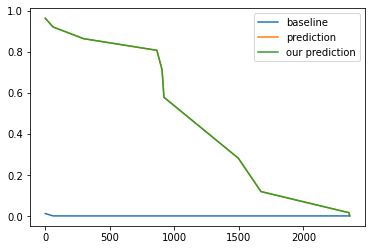

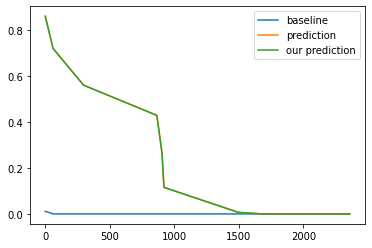

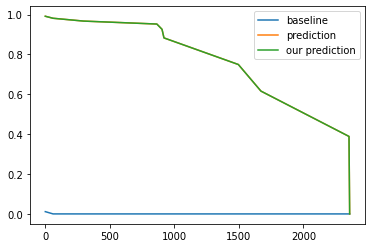

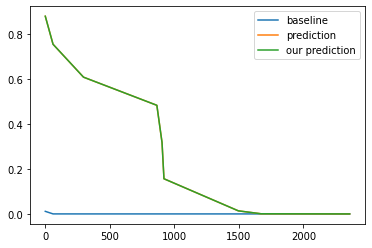

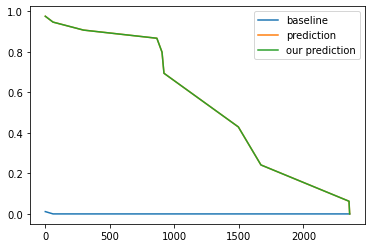

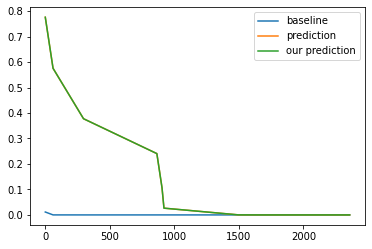

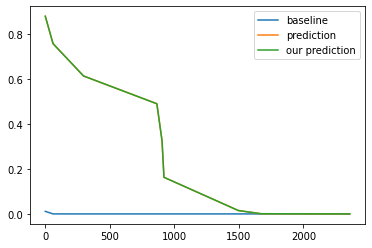

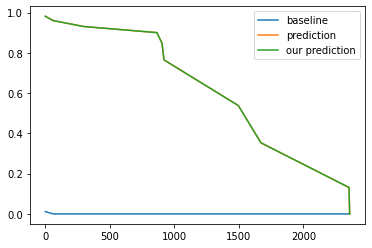

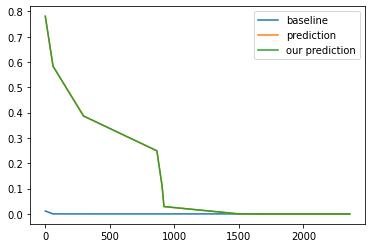

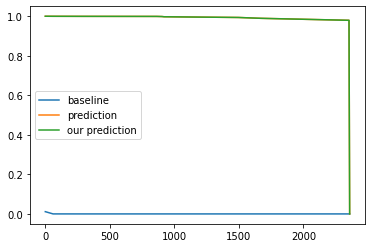

In [49]:
from time import sleep

for i in range(X.shape[0]):
    fig.clear()
    plt.plot(baseline.x, baseline.y, label='baseline')
    plt.plot(regular_prediction[i].x,regular_prediction[i].y, label='prediction')
    plt.plot(regular_prediction[i].x,our_prediction[i].y, label='our prediction')
    plt.legend()
    plt.show()
    
    sleep(2)

In [ ]:
from time import sleep

for i in range(X.shape[0]):
    fig.clear()
    plt.plot(baseline.x, baseline.y, label='baseline')
    plt.plot(regular_prediction[i].x,regular_prediction[i].y, label='prediction')
    #plt.plot(regular_prediction[i].x,our_prediction[i].y, label='our prediction')
    plt.legend()
    plt.show()
    
    sleep(2)